Import Necessary Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

Read Data:

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/Weather_Data.csv")
df.head()

Mounted at /content/drive


,Date,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,RainToday,Evaporation,Sunshine,WindGustDir,...,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
0,01-02-13,20.7,20.9,19.5,22.4,15.6,Yes,6.2,0.0,W,...,S,SSW,17,20,92,84,1017.6,1017.4,8,8
1,02-02-13,22.4,24.8,19.5,25.6,6.0,Yes,3.4,2.7,W,...,W,E,9,13,83,73,1017.9,1016.4,7,7
2,03-02-13,23.5,23.0,21.6,24.5,6.6,Yes,2.4,0.1,W,...,ESE,ESE,17,2,88,86,1016.7,1015.6,7,8
3,04-02-13,21.4,20.9,20.2,22.8,18.8,Yes,2.2,0.0,W,...,NNE,E,22,20,83,90,1014.2,1011.8,8,8
4,05-02-13,22.5,25.5,19.7,25.7,77.4,Yes,4.8,0.0,W,...,NNE,W,11,6,88,74,1008.3,1004.8,8,8


In [3]:
# check the df structer
df.info()

# describe df numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   Temp9am        3271 non-null   float64
 2   Temp3pm        3271 non-null   float64
 3   MinTemp        3271 non-null   float64
 4   MaxTemp        3271 non-null   float64
 5   Rainfall       3271 non-null   float64
 6   RainToday      3271 non-null   object 
 7   Evaporation    3271 non-null   float64
 8   Sunshine       3271 non-null   float64
 9   WindGustDir    3271 non-null   object 
 10  WindGustSpeed  3271 non-null   int64  
 11  WindDir9am     3271 non-null   object 
 12  WindDir3pm     3271 non-null   object 
 13  WindSpeed9am   3271 non-null   int64  
 14  WindSpeed3pm   3271 non-null   int64  
 15  Humidity9am    3271 non-null   int64  
 16  Humidity3pm    3271 non-null   int64  
 17  Pressure9am    3271 non-null   float64
 18  Pressure

,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
count,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000
mean,17.821461,21.543656,14.877102,23.005564,3.342158,5.175787,7.168970,41.476307,15.077041,19.294405,68.243962,54.698563,1018.334424,1016.003085,4.318557,4.176093
std,4.894316,4.297053,4.554710,4.483752,9.917746,2.757684,3.815966,10.806951,7.043825,7.453331,15.086127,16.279241,7.020090,7.019915,2.526923,2.411274
min,6.400000,10.200000,4.300000,11.700000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000
25%,13.800000,18.400000,11.000000,19.600000,0.000000,3.200000,4.250000,35.000000,11.000000,15.000000,58.000000,44.000000,1013.700000,1011.300000,2.000000,2.000000
50%,18.200000,21.300000,14.900000,22.800000,0.000000,4.800000,8.300000,41.000000,15.000000,19.000000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000
75%,21.700000,24.500000,18.800000,26.000000,1.400000,7.000000,10.200000,44.000000,20.000000,24.000000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000
max,36.500000,44.700000,27.600000,45.800000,119.400000,18.400000,13.600000,96.000000,54.000000,57.000000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000


Check The number of unique value in coloum:

In [4]:
for column in df.columns:
    print(column,df[column].nunique())

Date 3271
Temp9am 229
Temp3pm 240
MinTemp 204
MaxTemp 247
Rainfall 208
RainToday 2
Evaporation 82
Sunshine 137
WindGustDir 16
WindGustSpeed 44
WindDir9am 16
WindDir3pm 16
WindSpeed9am 26
WindSpeed3pm 29
Humidity9am 80
Humidity3pm 86
Pressure9am 361
Pressure3pm 369
Cloud9am 10
Cloud3pm 9


Data Annalysis:

In [5]:
# Check for missing values
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


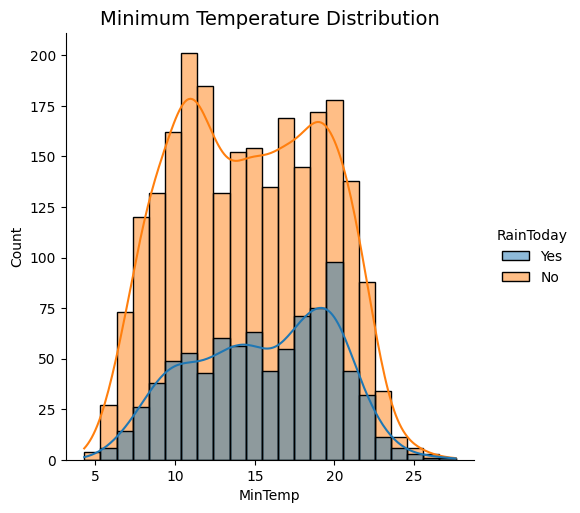

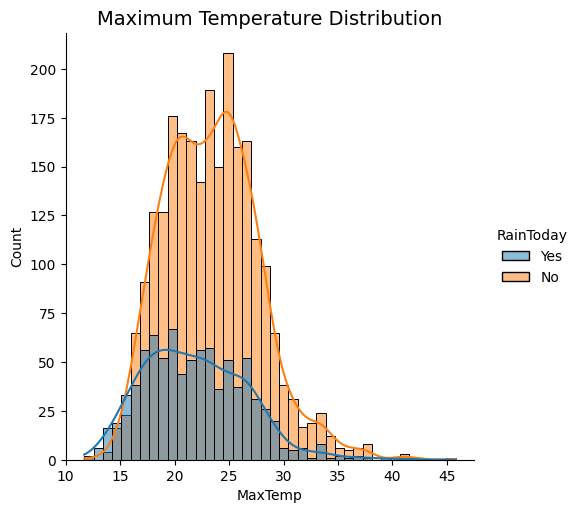

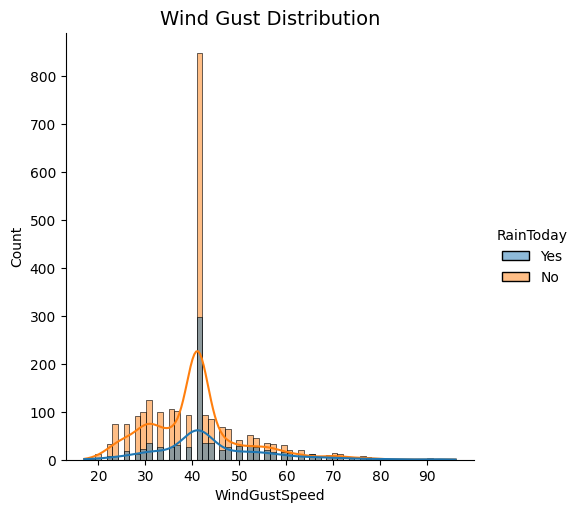

In [6]:
# Visualize temperature and wind speed distributions
sns.displot(df, x="MinTemp", hue='RainToday', kde=True)
plt.title("Minimum Temperature Distribution", fontsize=14)
plt.show()

sns.displot(df, x="MaxTemp", hue='RainToday', kde=True)
plt.title("Maximum Temperature Distribution", fontsize=14)
plt.show()

sns.displot(df, x="WindGustSpeed", hue='RainToday', kde=True)
plt.title("Wind Gust Distribution", fontsize=14)
plt.show()


EDA:

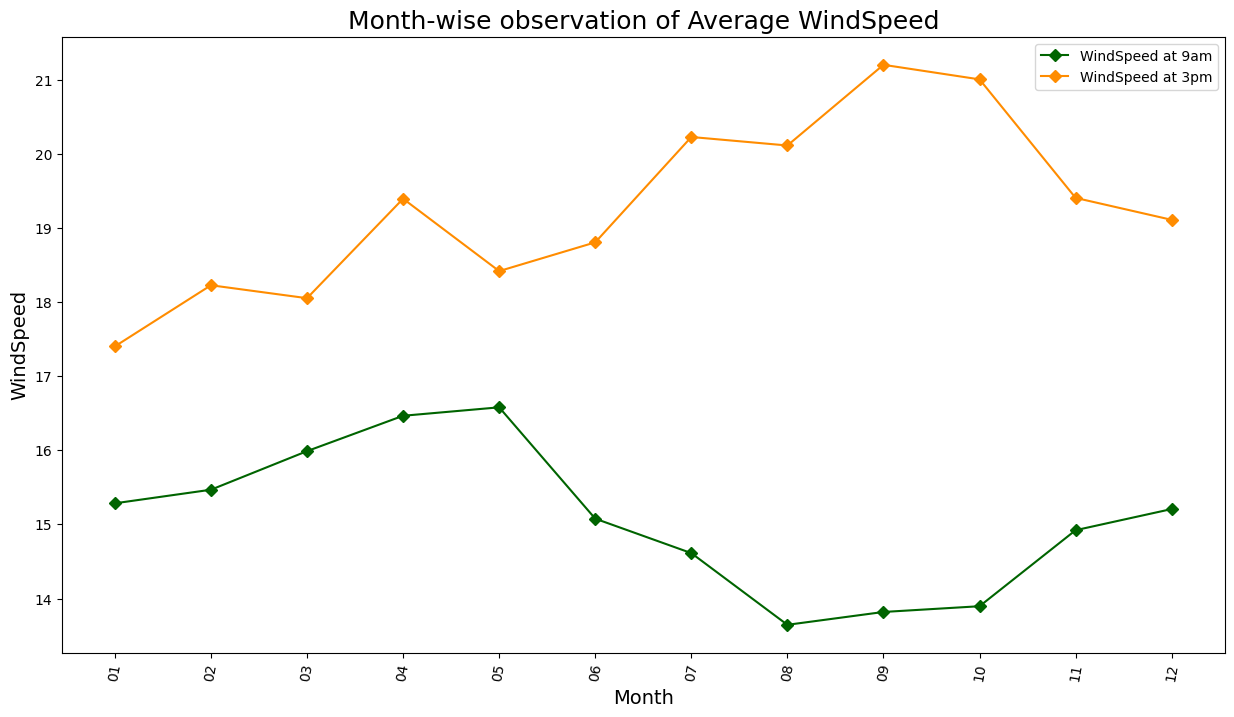

In [7]:
# Average WindSpeed Analysis
windspeed_weather_df = df.groupby(df['Date'].str[3:5])[['WindSpeed9am', 'WindSpeed3pm']].mean()
windspeed_weather_df = windspeed_weather_df.reset_index()

x = windspeed_weather_df.loc[:, 'Date']
y1 = windspeed_weather_df['WindSpeed9am']
y2 = windspeed_weather_df['WindSpeed3pm']

plt.figure(figsize=(15, 8))

plt.plot(x, y1, marker='D', color='darkgreen', label='WindSpeed at 9am')
plt.plot(x, y2, marker='D', color='darkorange', label='WindSpeed at 3pm')

plt.xlabel('Month', fontsize=14)
plt.ylabel('WindSpeed', fontsize=14)
plt.title('Month-wise observation of Average WindSpeed', fontsize=18)
plt.legend(fontsize=10, loc='best')
plt.xticks(rotation=80)
plt.show()

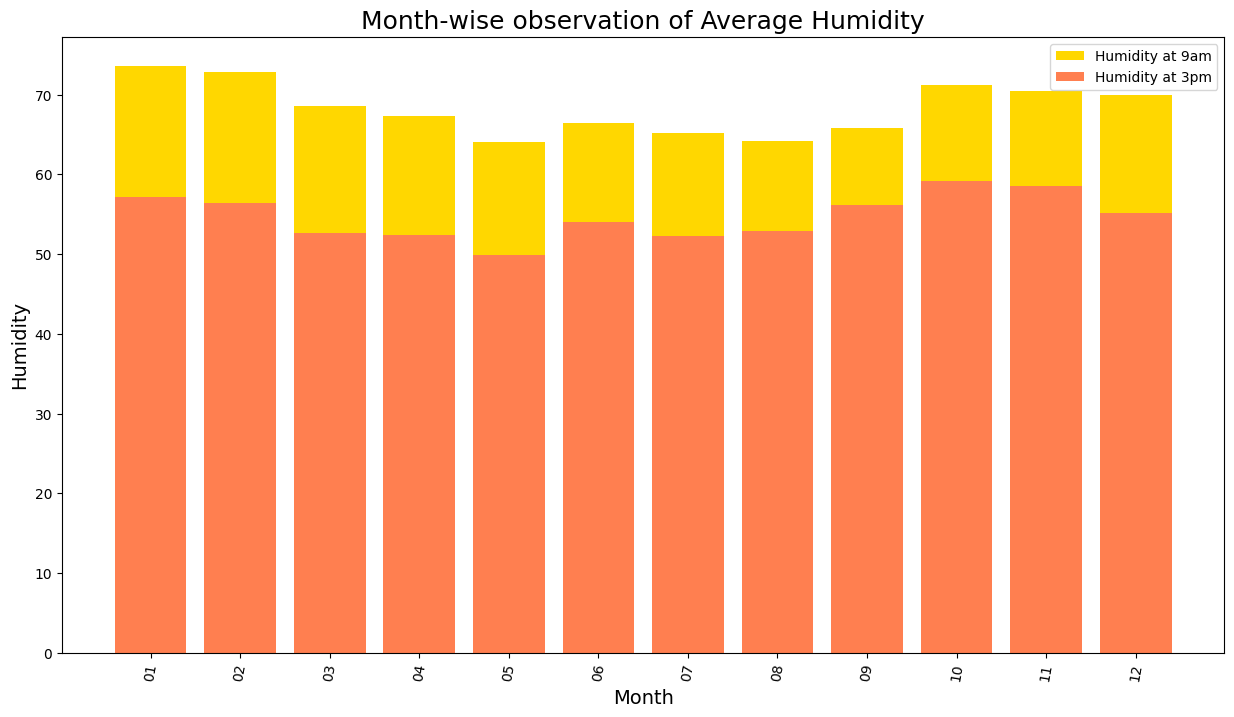

In [8]:
# Average Humidity Analysis
humidity_weather_df = df.groupby(df['Date'].str[3:5])[['Humidity9am', 'Humidity3pm']].mean()
humidity_weather_df = humidity_weather_df.reset_index()

x = humidity_weather_df.loc[:, 'Date']
y1 = humidity_weather_df['Humidity9am']
y2 = humidity_weather_df['Humidity3pm']

plt.figure(figsize=(15, 8))

plt.bar(x, y1, color='gold', label='Humidity at 9am')
plt.bar(x, y2, color='coral', label='Humidity at 3pm')

plt.xlabel('Month', fontsize=14)
plt.ylabel('Humidity', fontsize=14)
plt.title('Month-wise observation of Average Humidity', fontsize=18)
plt.legend(fontsize=10, loc='best')
plt.xticks(rotation=80)
plt.show()

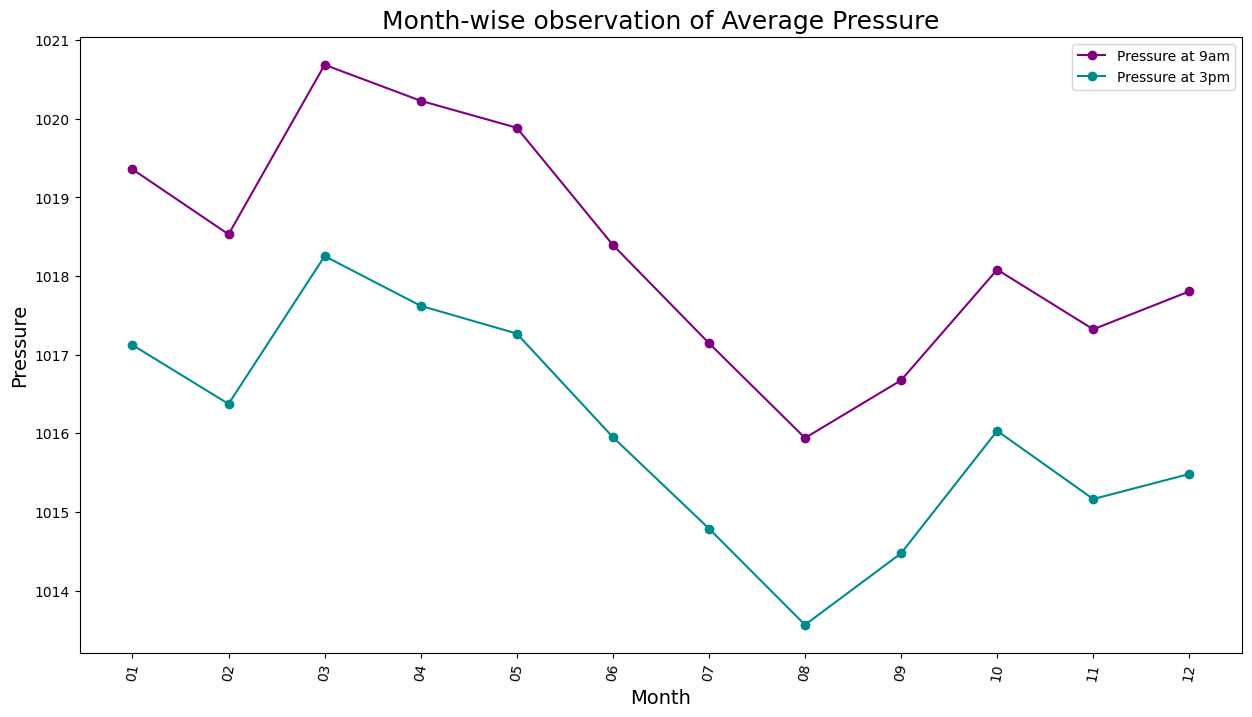

In [9]:
#Average Pressure Analysis

pressure_weather_df = df.groupby(df['Date'].str[3:5])[['Pressure9am', 'Pressure3pm']].mean()
pressure_weather_df = pressure_weather_df.reset_index()

x = pressure_weather_df.loc[:, 'Date']
y1 = pressure_weather_df['Pressure9am']
y2 = pressure_weather_df['Pressure3pm']

plt.figure(figsize=(15, 8))

plt.plot(x, y1, marker='o', color='purple', label='Pressure at 9am')
plt.plot(x, y2, marker='o', color='darkcyan', label='Pressure at 3pm')

plt.xlabel('Month', fontsize=14)
plt.ylabel('Pressure', fontsize=14)
plt.title('Month-wise observation of Average Pressure', fontsize=18)
plt.legend(fontsize=10, loc='best')
plt.xticks(rotation=80)
plt.show()

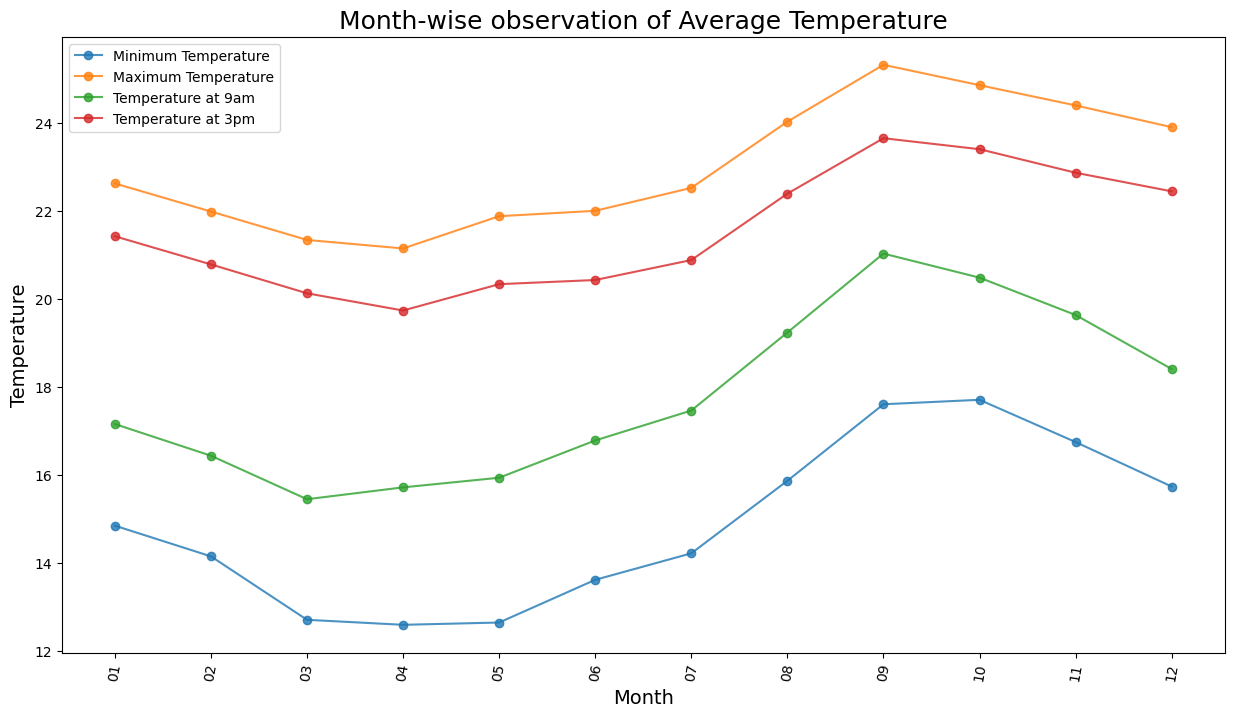

In [10]:
#Average Temperature Analysis
location_weather_df = df.groupby(df['Date'].str[3:5])[['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']].mean()
location_weather_df = location_weather_df.reset_index()

x = location_weather_df.loc[:, 'Date']
y1 = location_weather_df['MinTemp']
y2 = location_weather_df['MaxTemp']
y3 = location_weather_df['Temp9am']
y4 = location_weather_df['Temp3pm']

plt.figure(figsize=(15, 8))

plt.plot(x, y1, label='Minimum Temperature', marker='o', alpha=0.8)
plt.plot(x, y2, label='Maximum Temperature', marker='o', alpha=0.8)
plt.plot(x, y3, label='Temperature at 9am', marker='o', alpha=0.8)
plt.plot(x, y4, label='Temperature at 3pm', marker='o', alpha=0.8)

plt.xlabel('Month', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.title('Month-wise observation of Average Temperature', fontsize=18)
plt.legend(fontsize=10, loc='best')
plt.xticks(rotation=80)
plt.show()


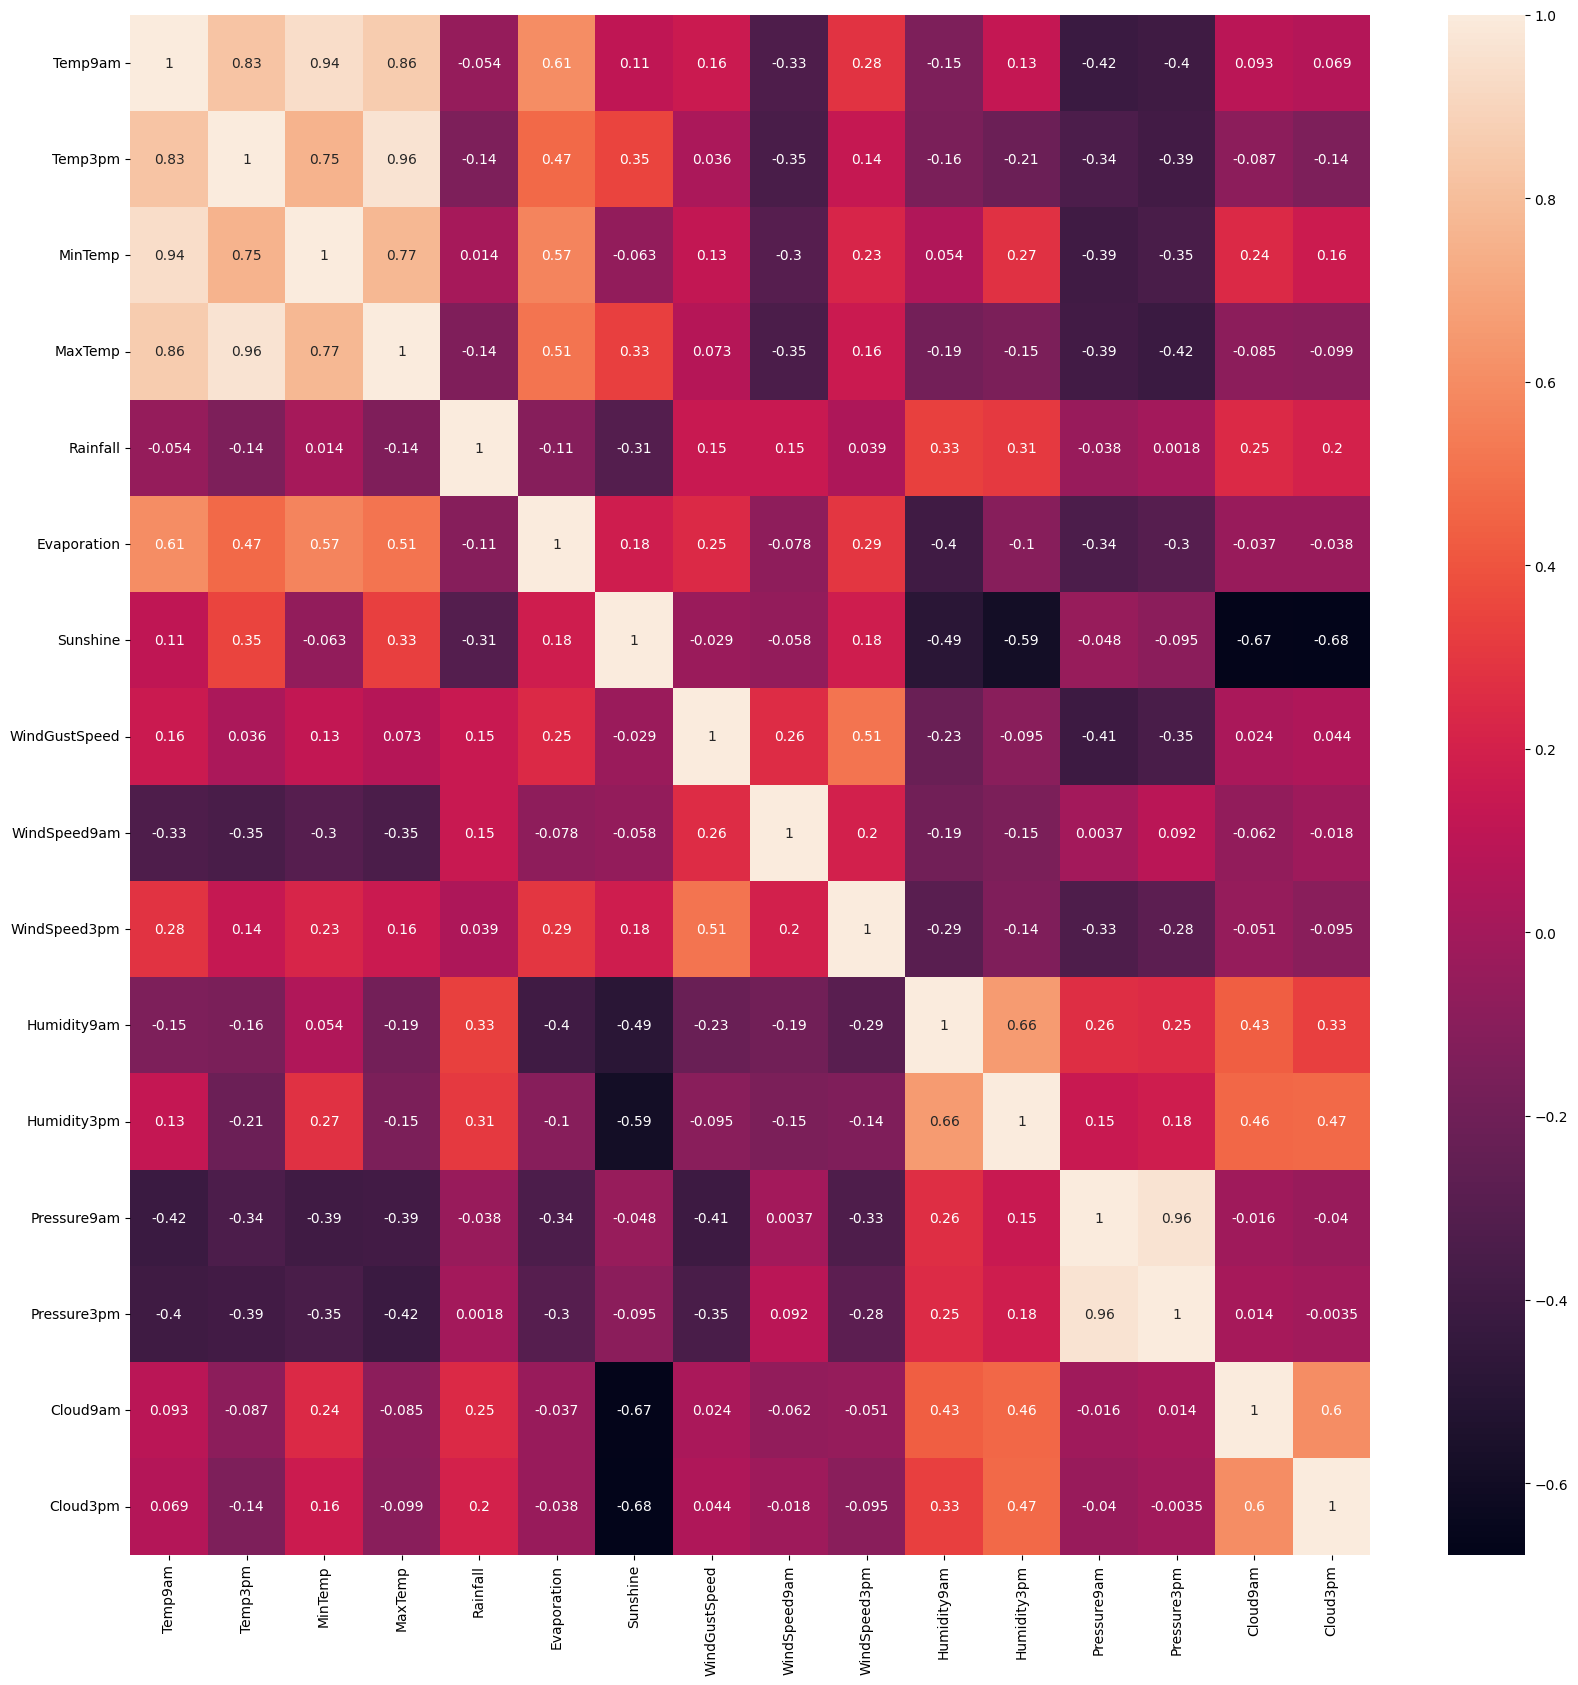

In [11]:
# Correlation analysis
bf = df.drop(columns=['Date', 'RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])
bf.corr()

# Plot the correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(bf.corr(), annot=True)
plt.show()


Data Processing:

In [12]:
# Assuming 'Date' is your date feature in the DataFrame df
df['Date'] = pd.to_datetime(df['Date'])

# Extract relevant features from the date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek  # Monday is 0 and Sunday is 6

# Drop the original 'Date' column
df = df.drop(columns=['Date'])

In [13]:
#Specify the target variable
target_column = 'RainToday'
label_encoder = LabelEncoder()
df[target_column] = label_encoder.fit_transform(df[target_column])

# Specify your features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Encode categorical variables
label_encoder = LabelEncoder()
columns_to_encode = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
for column in columns_to_encode:
    X[column] = label_encoder.fit_transform(X[column].astype(str))

# One-hot encode categorical features
categorical_features = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'Month', 'DayOfWeek']
X = pd.get_dummies(X, columns=categorical_features)

In [14]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Fit the Model:

In [15]:
# Add Support Vector Machine (SVM) model
svm_model = SVC(kernel="linear")

# Fit the SVM model
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [16]:
# Fit Decision Tree Classifier
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
# Fit Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [18]:
# Fit Random Forest Classifier
model_rfc = RandomForestClassifier(criterion='entropy', max_depth=3, max_features='sqrt', n_estimators=100)
model_rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3)

Feature Importance:

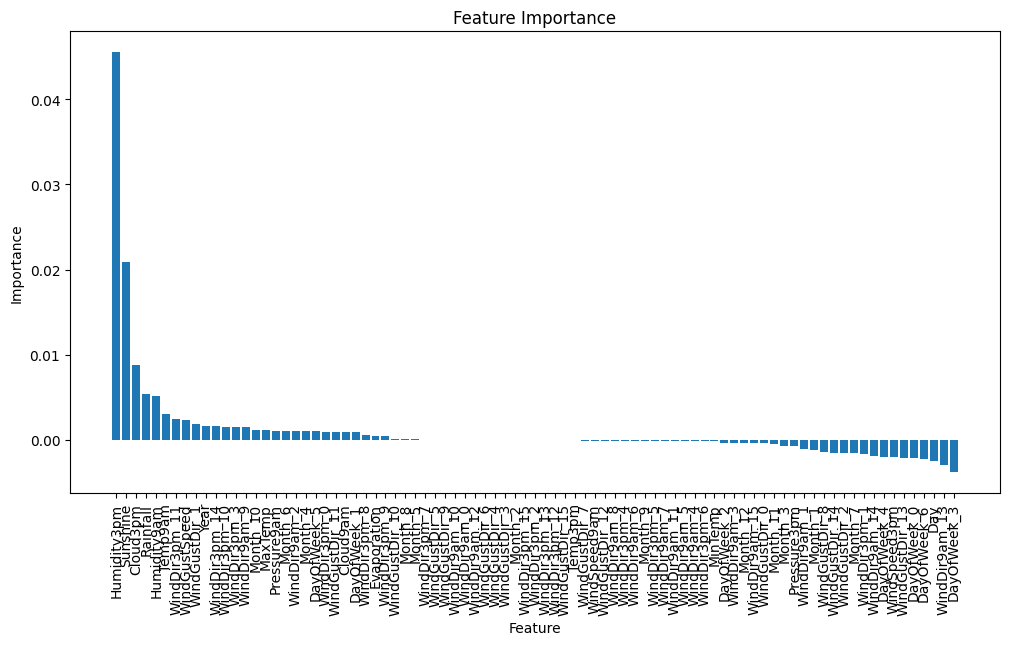

In [19]:
# Create and fit a classifier model (Random Forest, for example)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Calculate permutation feature importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Get feature importances and indices
importances = result.importances_mean
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(X_test.shape[1]), importances[indices], align="center")
plt.xticks(range(X_test.shape[1]), X_test.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()


Support Vector Machine:

Support Vector Machine (SVM) Scores:
[0.83015267 0.83938815 0.82409178 0.84512428 0.82217973]
Mean SVM Score: 0.8321873221140514


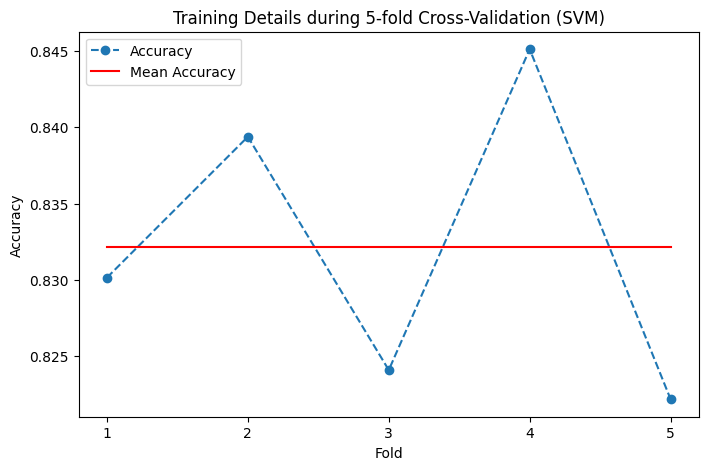

Support Vector Machine (SVM) Accuracy: 0.8137404580152672
Confusion Matrix (SVM):
[[439  37]
 [ 85  94]]
SVM Precision: 0.7175572519083969
SVM Recall: 0.5251396648044693
SVM F1-score: 0.6064516129032258
SVM Accuracy: 0.8137404580152672
Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       476
           1       0.72      0.53      0.61       179

    accuracy                           0.81       655
   macro avg       0.78      0.72      0.74       655
weighted avg       0.80      0.81      0.80       655



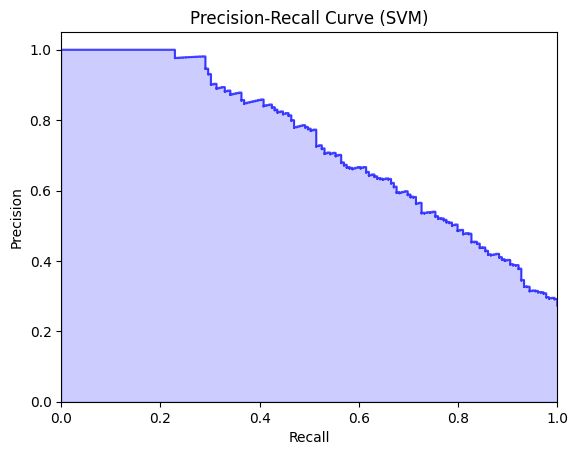

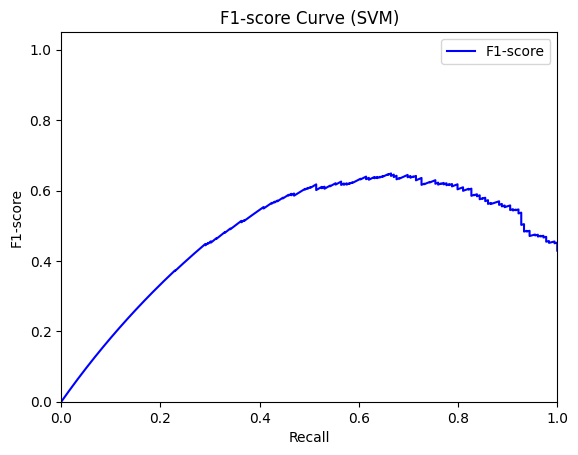

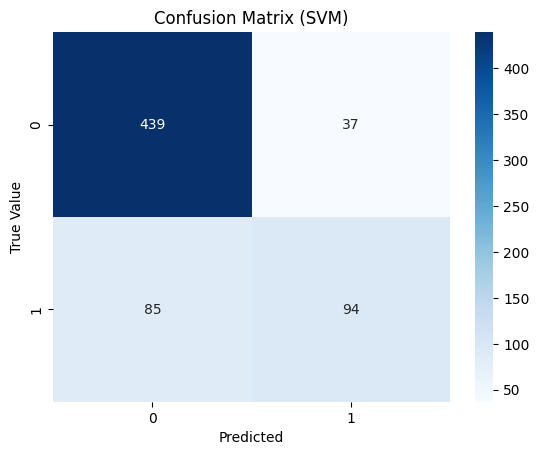

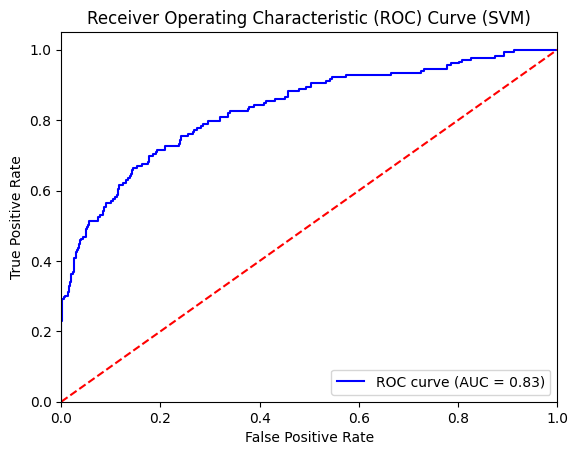

In [20]:
# Add Support Vector Machine (SVM) model
# Cross-validate SVM model
svm_scores = cross_val_score(estimator=svm_model, X=X_train, y=y_train, cv=5)
svm_mean_score = np.mean(svm_scores)

print("Support Vector Machine (SVM) Scores:")
print(svm_scores)
print("Mean SVM Score:", svm_mean_score)

# Plot training details for SVM
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), svm_scores, marker='o', linestyle='--', label='Accuracy')
plt.plot(range(1, 6), [svm_mean_score] * 5, color='r', linestyle='-', label='Mean Accuracy')
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training Details during 5-fold Cross-Validation (SVM)')
plt.legend()
plt.show()

# Evaluate SVM model on the test set
svm_model_score = svm_model.score(X_test, y_test)
print("Support Vector Machine (SVM) Accuracy:", svm_model_score)

# Confusion matrix for SVM
svm_y_pred = svm_model.predict(X_test)
svm_cm = confusion_matrix(y_test, svm_y_pred)
print("Confusion Matrix (SVM):")
print(svm_cm)

# Evaluate additional metrics for SVM
svm_precision = precision_score(y_test, svm_y_pred)
svm_recall = recall_score(y_test, svm_y_pred)
svm_f1 = f1_score(y_test, svm_y_pred)
svm_accuracy = accuracy_score(y_test, svm_y_pred)

print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1-score:", svm_f1)
print("SVM Accuracy:", svm_accuracy)

# Classification report for SVM
svm_class_report = classification_report(y_test, svm_y_pred)
print("Classification Report (SVM):")
print(svm_class_report)

# Plot Precision-Recall curve for SVM
svm_y_pred_probs = svm_model.decision_function(X_test)
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_y_pred_probs)

plt.step(svm_recall, svm_precision, color='b', alpha=0.7, where='post')
plt.fill_between(svm_recall, svm_precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (SVM)')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve for SVM
svm_f1_values = 2 * (svm_precision * svm_recall) / (svm_precision + svm_recall)
plt.plot(svm_recall, svm_f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve (SVM)')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Calculate confusion matrix for SVM
svm_cm = confusion_matrix(y_test, svm_y_pred)

# Create a heatmap for the confusion matrix (SVM)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.title('Confusion Matrix (SVM)')
plt.show()

# Calculate ROC curve and AUC for SVM
svm_y_pred_probs = svm_model.decision_function(X_test)
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_y_pred_probs)
svm_roc_auc = auc(svm_fpr, svm_tpr)

# Plot ROC curve for SVM
plt.plot(svm_fpr, svm_tpr, color='b', label='ROC curve (AUC = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (SVM)')
plt.legend(loc="lower right")
plt.show()


Decision Tree Classifier:

Decision Tree Classifier Accuracy: 0.7633587786259542
Confusion Matrix (Decision Tree):
[[399  77]
 [ 78 101]]
Precision: 0.5674157303370787
Recall: 0.5642458100558659
F1-score: 0.5658263305322129


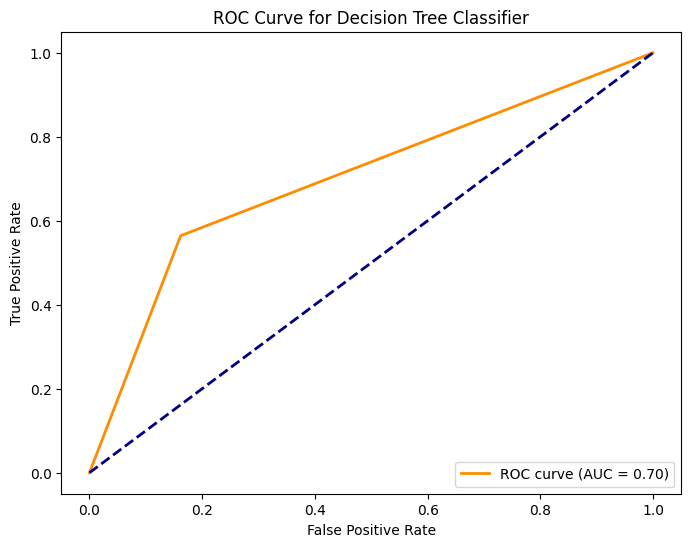

In [21]:
# Evaluate the model on the test set
dtc_model_score = dtc_model.score(X_test, y_test)
print("Decision Tree Classifier Accuracy:", dtc_model_score)

# Confusion matrix for Decision Tree Classifier
dtc_y_pred = dtc_model.predict(X_test)
dtc_cm = confusion_matrix(y_test, dtc_y_pred)
print("Confusion Matrix (Decision Tree):")
print(dtc_cm)


# Additional Evaluation Metrics
dtc_precision = precision_score(y_test, dtc_y_pred)
dtc_recall = recall_score(y_test, dtc_y_pred)
dtc_f1 = f1_score(y_test, dtc_y_pred)

print("Precision:", dtc_precision)
print("Recall:", dtc_recall)
print("F1-score:", dtc_f1)

# Plot ROC Curve
dtc_y_scores = dtc_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, dtc_y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix (Decision Tree Classifier):
[[399  77]
 [ 78 101]]


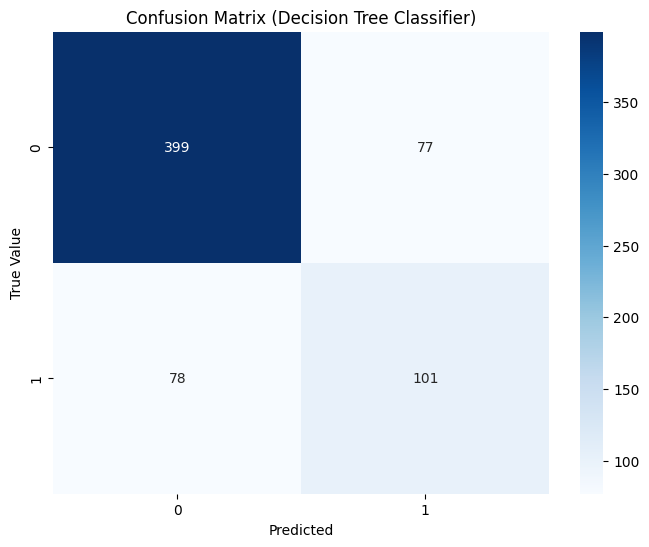

In [22]:
# Confusion matrix for Decision Tree Classifier
dtc_y_pred = dtc_model.predict(X_test)
dtc_cm = confusion_matrix(y_test, dtc_y_pred)
print("Confusion Matrix (Decision Tree Classifier):")
print(dtc_cm)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dtc_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.title('Confusion Matrix (Decision Tree Classifier)')
plt.show()


Gradient Boosting Classifier:

Gradient Boosting Classifier Accuracy: 0.8198473282442749
Confusion Matrix (Gradient Boosting Classifier):
[[445  31]
 [ 87  92]]
Precision (Gradient Boosting Classifier): 0.7479674796747967
Recall (Gradient Boosting Classifier): 0.5139664804469274
F1-score (Gradient Boosting Classifier): 0.609271523178808


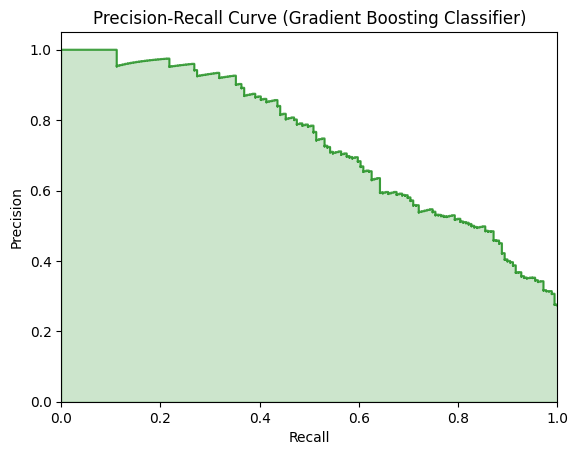

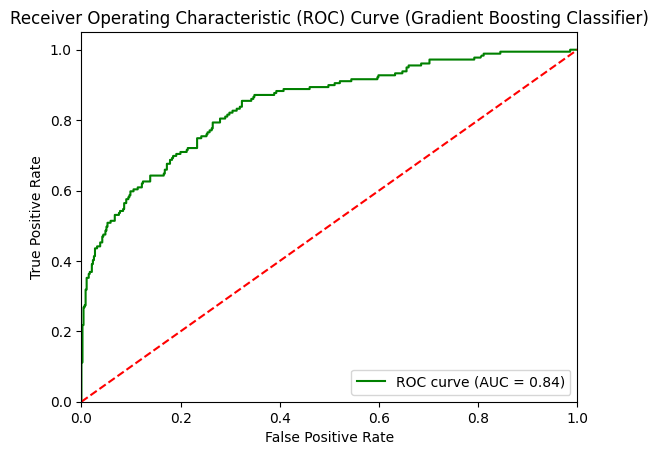

In [23]:
# Evaluate Gradient Boosting Classifier
gb_model_score = gb_model.score(X_test, y_test)
print("Gradient Boosting Classifier Accuracy:", gb_model_score)
# Confusion matrix for Gradient Boosting Classifier
gb_y_pred = gb_model.predict(X_test)
gb_cm = confusion_matrix(y_test, gb_y_pred)
print("Confusion Matrix (Gradient Boosting Classifier):")
print(gb_cm)

# Additional Evaluation Metrics for Gradient Boosting Classifier
gb_precision = precision_score(y_test, gb_y_pred)
gb_recall = recall_score(y_test, gb_y_pred)
gb_f1 = f1_score(y_test, gb_y_pred)

print("Precision (Gradient Boosting Classifier):", gb_precision)
print("Recall (Gradient Boosting Classifier):", gb_recall)
print("F1-score (Gradient Boosting Classifier):", gb_f1)

# Visualize Precision-Recall curve for Gradient Boosting Classifier
gb_y_pred_probs = gb_model.predict_proba(X_test)[:, 1]
gb_precision, gb_recall, _ = precision_recall_curve(y_test, gb_y_pred_probs)

plt.step(gb_recall, gb_precision, color='g', alpha=0.7, where='post')
plt.fill_between(gb_recall, gb_precision, step='post', alpha=0.2, color='g')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Gradient Boosting Classifier)')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Visualize ROC curve for Gradient Boosting Classifier
gb_fpr, gb_tpr, gb_thresholds = roc_curve(y_test, gb_y_pred_probs)
gb_roc_auc = auc(gb_fpr, gb_tpr)

plt.plot(gb_fpr, gb_tpr, color='g', label='ROC curve (AUC = %0.2f)' % gb_roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Gradient Boosting Classifier)')
plt.legend(loc="lower right")
plt.show()




Confusion Matrix (Gradient Boosting Classifier):
[[445  31]
 [ 87  92]]


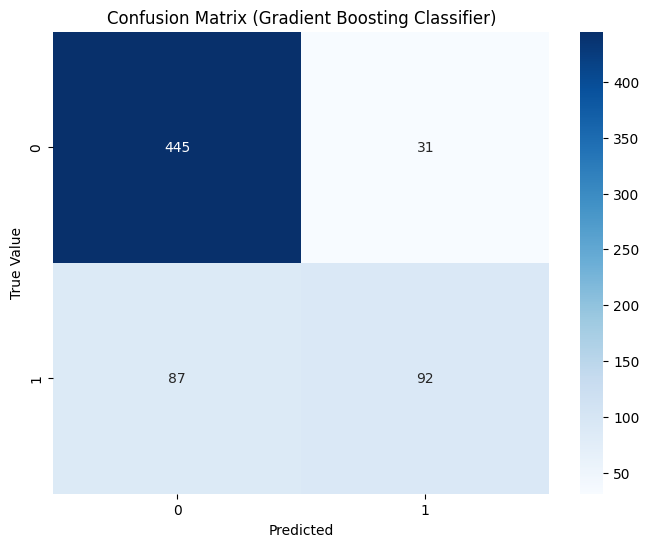

In [24]:

# Confusion matrix for Gradient Boosting Classifier
gb_y_pred = gb_model.predict(X_test)
gb_cm = confusion_matrix(y_test, gb_y_pred)
print("Confusion Matrix (Gradient Boosting Classifier):")
print(gb_cm)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Blues')  # Corrected usage of sns
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.title('Confusion Matrix (Gradient Boosting Classifier)')
plt.show()


Random Forest Classifier:

Precision: 0.9230769230769231
Recall: 0.33519553072625696
F1-score: 0.4918032786885245
Accuracy: 0.8106870229007633
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.88       476
           1       0.92      0.34      0.49       179

    accuracy                           0.81       655
   macro avg       0.86      0.66      0.69       655
weighted avg       0.83      0.81      0.78       655



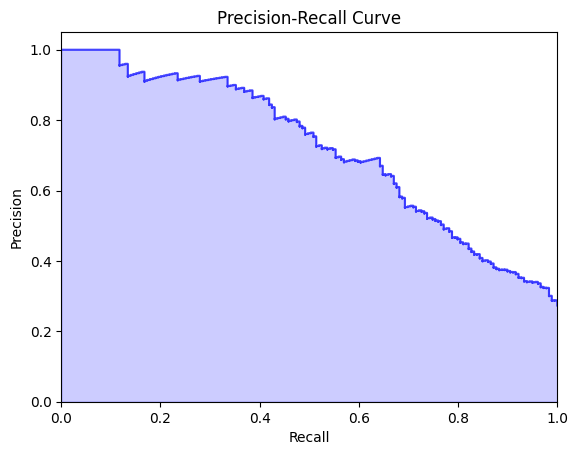

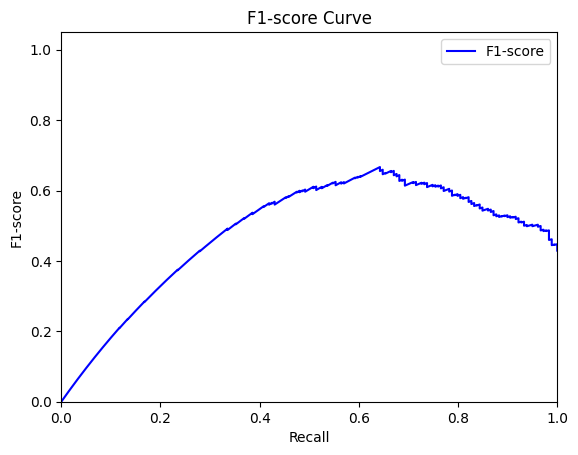

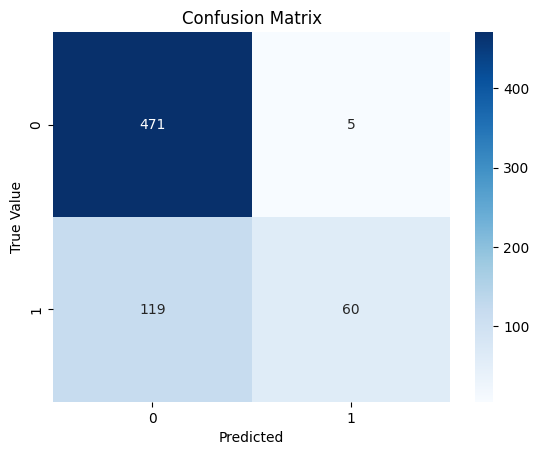

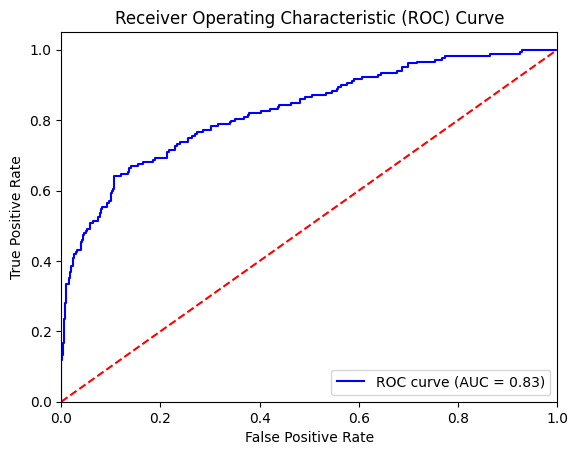

In [25]:
# Predict on the test set
y_pred = model_rfc.predict(X_test)

# Evaluate additional metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = model_rfc.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
y_pred_probs = model_rfc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Precision curve,  Recall curve, F1-score curve, Accuracy curve of SVM:

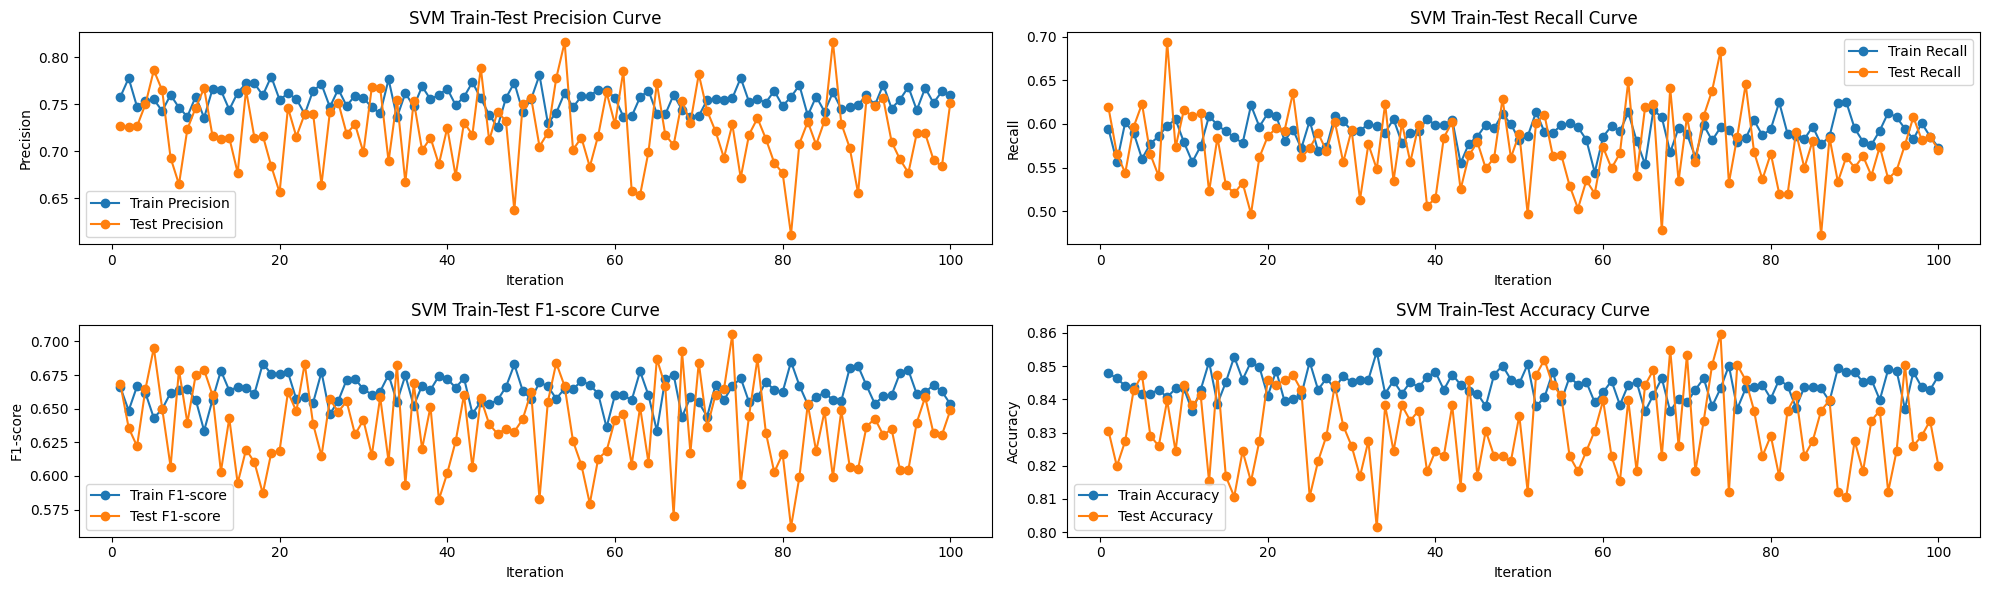

In [26]:
# Initialize lists to store train and test scores for each iteration
svm_train_precision, svm_test_precision = [], []
svm_train_recall, svm_test_recall = [], []
svm_train_f1, svm_test_f1 = [], []
svm_train_accuracy, svm_test_accuracy = [], []

# Number of iterations for train-test splits
num_iterations = 100

for i in range(num_iterations):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Step 3: Model training
    svm_model = SVC(kernel="linear")
    svm_model.fit(X_train, y_train)

    # Step 4: Model evaluation on train and test sets
    y_train_pred = svm_model.predict(X_train)
    y_test_pred = svm_model.predict(X_test)

    # Calculate precision, recall, F1-score, and accuracy for train and test sets
    svm_train_precision.append(precision_score(y_train, y_train_pred))
    svm_test_precision.append(precision_score(y_test, y_test_pred))

    svm_train_recall.append(recall_score(y_train, y_train_pred))
    svm_test_recall.append(recall_score(y_test, y_test_pred))

    svm_train_f1.append(f1_score(y_train, y_train_pred))
    svm_test_f1.append(f1_score(y_test, y_test_pred))

    svm_train_accuracy.append(accuracy_score(y_train, y_train_pred))
    svm_test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Plot train-test curves for SVM
iterations = np.arange(1, num_iterations + 1)

plt.figure(figsize=(20, 6))

# Precision curve
plt.subplot(2, 2, 1)
plt.plot(iterations, svm_train_precision, marker='o', label='Train Precision')
plt.plot(iterations, svm_test_precision, marker='o', label='Test Precision')
plt.xlabel('Iteration')
plt.ylabel('Precision')
plt.title('SVM Train-Test Precision Curve')
plt.legend()

# Recall curve
plt.subplot(2, 2, 2)
plt.plot(iterations, svm_train_recall, marker='o', label='Train Recall')
plt.plot(iterations, svm_test_recall, marker='o', label='Test Recall')
plt.xlabel('Iteration')
plt.ylabel('Recall')
plt.title('SVM Train-Test Recall Curve')
plt.legend()

# F1-score curve
plt.subplot(2, 2, 3)
plt.plot(iterations, svm_train_f1, marker='o', label='Train F1-score')
plt.plot(iterations, svm_test_f1, marker='o', label='Test F1-score')
plt.xlabel('Iteration')
plt.ylabel('F1-score')
plt.title('SVM Train-Test F1-score Curve')
plt.legend()

# Accuracy curve
plt.subplot(2, 2, 4)
plt.plot(iterations, svm_train_accuracy, marker='o', label='Train Accuracy')
plt.plot(iterations, svm_test_accuracy, marker='o', label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('SVM Train-Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()


Precision curve,  Recall curve, F1-score curve, Accuracy curve of DecisionTreeClassifier:

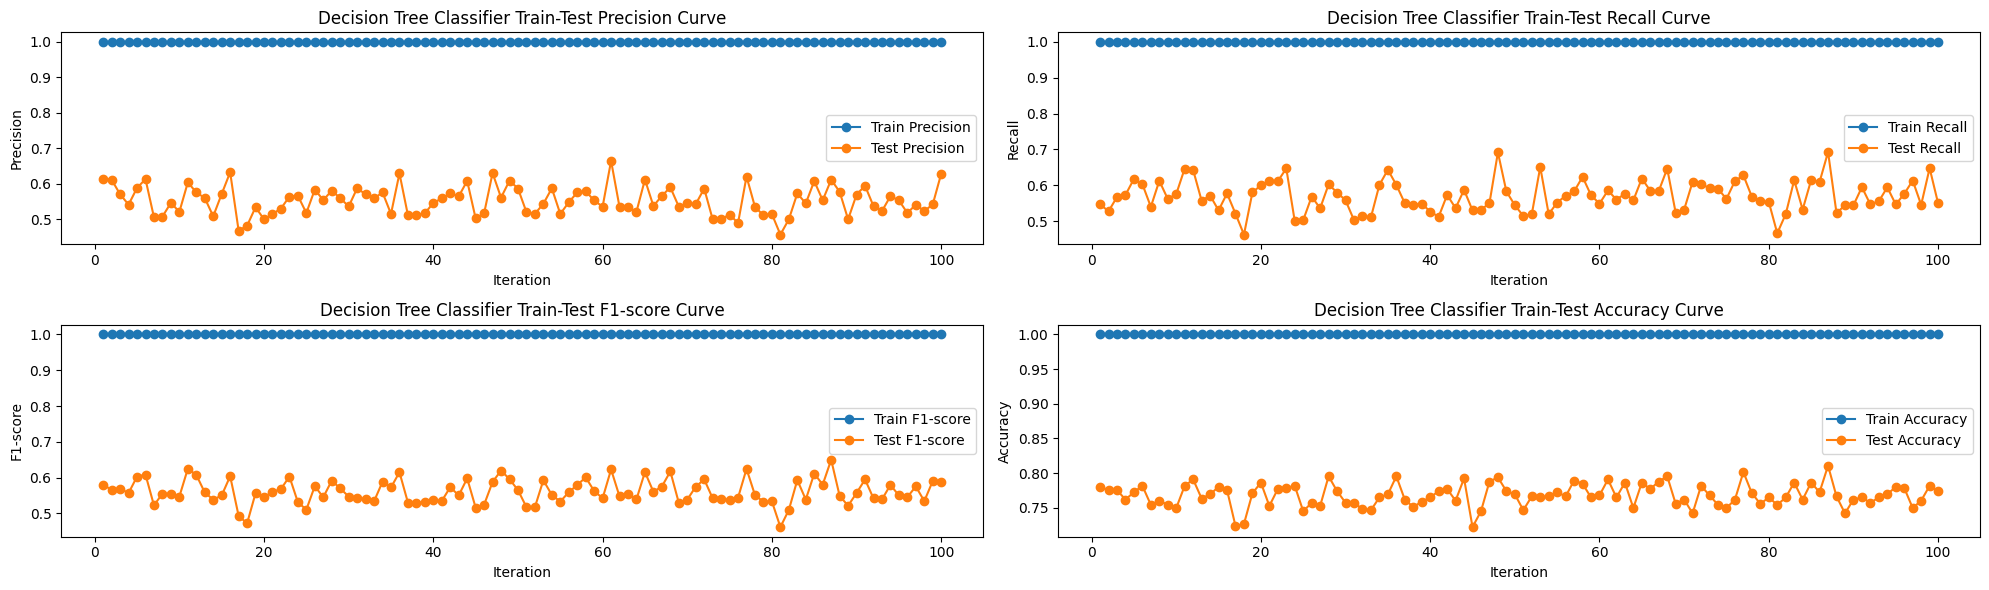

In [27]:
# Initialize lists to store train and test scores for each iteration
dtc_train_precision, dtc_test_precision = [], []
dtc_train_recall, dtc_test_recall = [], []
dtc_train_f1, dtc_test_f1 = [], []
dtc_train_accuracy, dtc_test_accuracy = [], []

# Number of iterations for train-test splits
num_iterations = 100

for i in range(num_iterations):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Step 3: Model training
    dtc_model = DecisionTreeClassifier()
    dtc_model.fit(X_train, y_train)

    # Step 4: Model evaluation on train and test sets
    y_train_pred = dtc_model.predict(X_train)
    y_test_pred = dtc_model.predict(X_test)

    # Calculate precision, recall, F1-score, and accuracy for train and test sets
    dtc_train_precision.append(precision_score(y_train, y_train_pred))
    dtc_test_precision.append(precision_score(y_test, y_test_pred))

    dtc_train_recall.append(recall_score(y_train, y_train_pred))
    dtc_test_recall.append(recall_score(y_test, y_test_pred))

    dtc_train_f1.append(f1_score(y_train, y_train_pred))
    dtc_test_f1.append(f1_score(y_test, y_test_pred))

    dtc_train_accuracy.append(accuracy_score(y_train, y_train_pred))
    dtc_test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Plot train-test curves for Decision Tree Classifier
iterations = np.arange(1, num_iterations + 1)

plt.figure(figsize=(20, 6))

# Precision curve
plt.subplot(2, 2, 1)
plt.plot(iterations, dtc_train_precision, marker='o', label='Train Precision')
plt.plot(iterations, dtc_test_precision, marker='o', label='Test Precision')
plt.xlabel('Iteration')
plt.ylabel('Precision')
plt.title('Decision Tree Classifier Train-Test Precision Curve')
plt.legend()

# Recall curve
plt.subplot(2, 2, 2)
plt.plot(iterations, dtc_train_recall, marker='o', label='Train Recall')
plt.plot(iterations, dtc_test_recall, marker='o', label='Test Recall')
plt.xlabel('Iteration')
plt.ylabel('Recall')
plt.title('Decision Tree Classifier Train-Test Recall Curve')
plt.legend()

# F1-score curve
plt.subplot(2, 2, 3)
plt.plot(iterations, dtc_train_f1, marker='o', label='Train F1-score')
plt.plot(iterations, dtc_test_f1, marker='o', label='Test F1-score')
plt.xlabel('Iteration')
plt.ylabel('F1-score')
plt.title('Decision Tree Classifier Train-Test F1-score Curve')
plt.legend()

# Accuracy curve
plt.subplot(2, 2, 4)
plt.plot(iterations, dtc_train_accuracy, marker='o', label='Train Accuracy')
plt.plot(iterations, dtc_test_accuracy, marker='o', label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier Train-Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()


Precision curve,  Recall curve, F1-score curve, Accuracy curve of GradientBoostingClassifier:

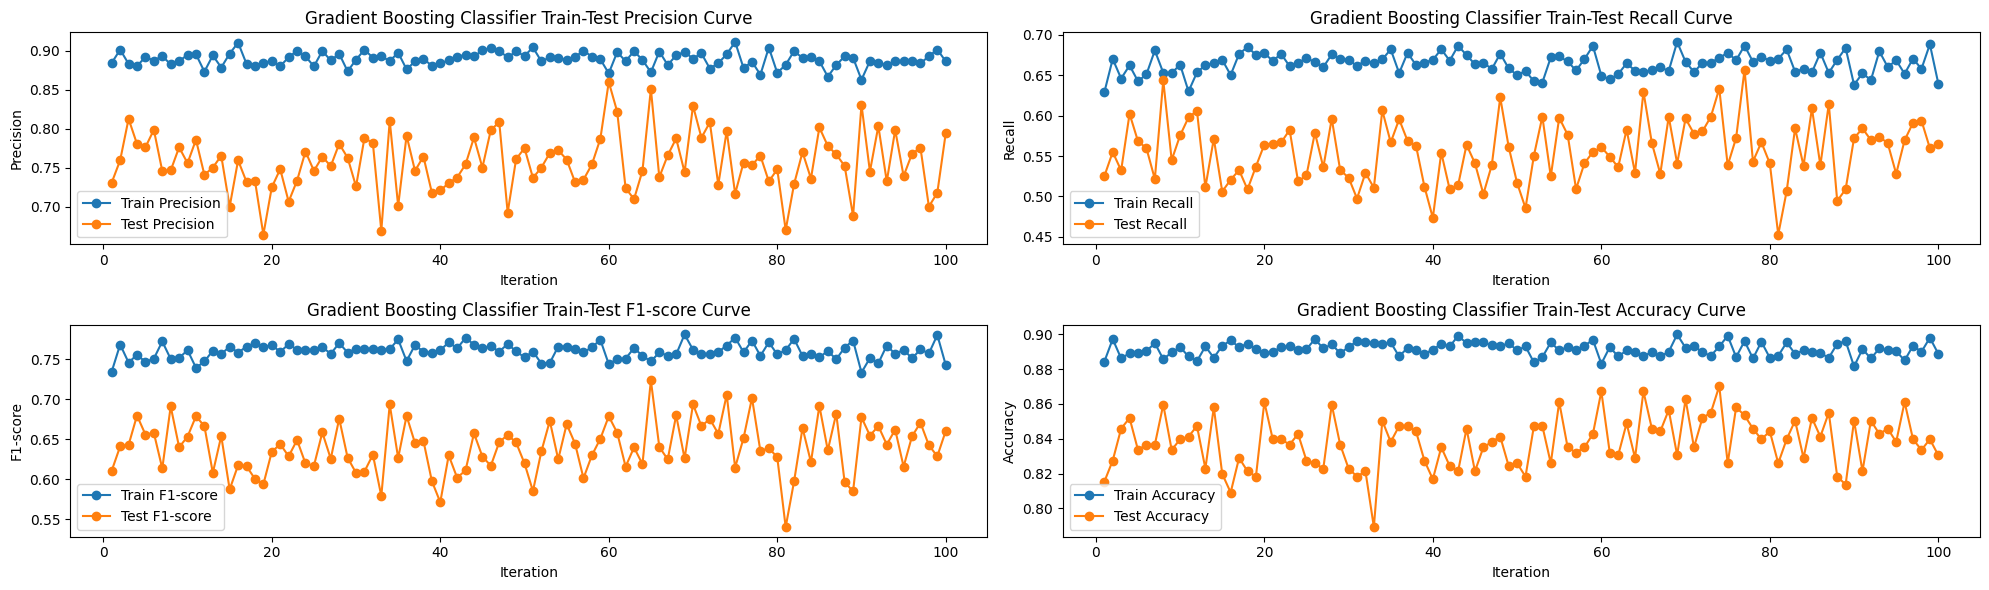

In [28]:
# Initialize lists to store train and test scores for each iteration
gb_train_precision, gb_test_precision = [], []
gb_train_recall, gb_test_recall = [], []
gb_train_f1, gb_test_f1 = [], []
gb_train_accuracy, gb_test_accuracy = [], []

# Number of iterations for train-test splits
num_iterations = 100

for i in range(num_iterations):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Step 3: Model training
    gb_model = GradientBoostingClassifier()
    gb_model.fit(X_train, y_train)

    # Step 4: Model evaluation on train and test sets
    y_train_pred = gb_model.predict(X_train)
    y_test_pred = gb_model.predict(X_test)

    # Calculate precision, recall, F1-score, and accuracy for train and test sets
    gb_train_precision.append(precision_score(y_train, y_train_pred))
    gb_test_precision.append(precision_score(y_test, y_test_pred))

    gb_train_recall.append(recall_score(y_train, y_train_pred))
    gb_test_recall.append(recall_score(y_test, y_test_pred))

    gb_train_f1.append(f1_score(y_train, y_train_pred))
    gb_test_f1.append(f1_score(y_test, y_test_pred))

    gb_train_accuracy.append(accuracy_score(y_train, y_train_pred))
    gb_test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Plot train-test curves for Gradient Boosting Classifier
iterations = np.arange(1, num_iterations + 1)

plt.figure(figsize=(20, 6))

# Precision curve
plt.subplot(2, 2, 1)
plt.plot(iterations, gb_train_precision, marker='o', label='Train Precision')
plt.plot(iterations, gb_test_precision, marker='o', label='Test Precision')
plt.xlabel('Iteration')
plt.ylabel('Precision')
plt.title('Gradient Boosting Classifier Train-Test Precision Curve')
plt.legend()

# Recall curve
plt.subplot(2, 2, 2)
plt.plot(iterations, gb_train_recall, marker='o', label='Train Recall')
plt.plot(iterations, gb_test_recall, marker='o', label='Test Recall')
plt.xlabel('Iteration')
plt.ylabel('Recall')
plt.title('Gradient Boosting Classifier Train-Test Recall Curve')
plt.legend()

# F1-score curve
plt.subplot(2, 2, 3)
plt.plot(iterations, gb_train_f1, marker='o', label='Train F1-score')
plt.plot(iterations, gb_test_f1, marker='o', label='Test F1-score')
plt.xlabel('Iteration')
plt.ylabel('F1-score')
plt.title('Gradient Boosting Classifier Train-Test F1-score Curve')
plt.legend()

# Accuracy curve
plt.subplot(2, 2, 4)
plt.plot(iterations, gb_train_accuracy, marker='o', label='Train Accuracy')
plt.plot(iterations, gb_test_accuracy, marker='o', label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Gradient Boosting Classifier Train-Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()


Precision curve, Recall curve, F1-score curve, Accuracy curve of RandomForestClassifier:

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

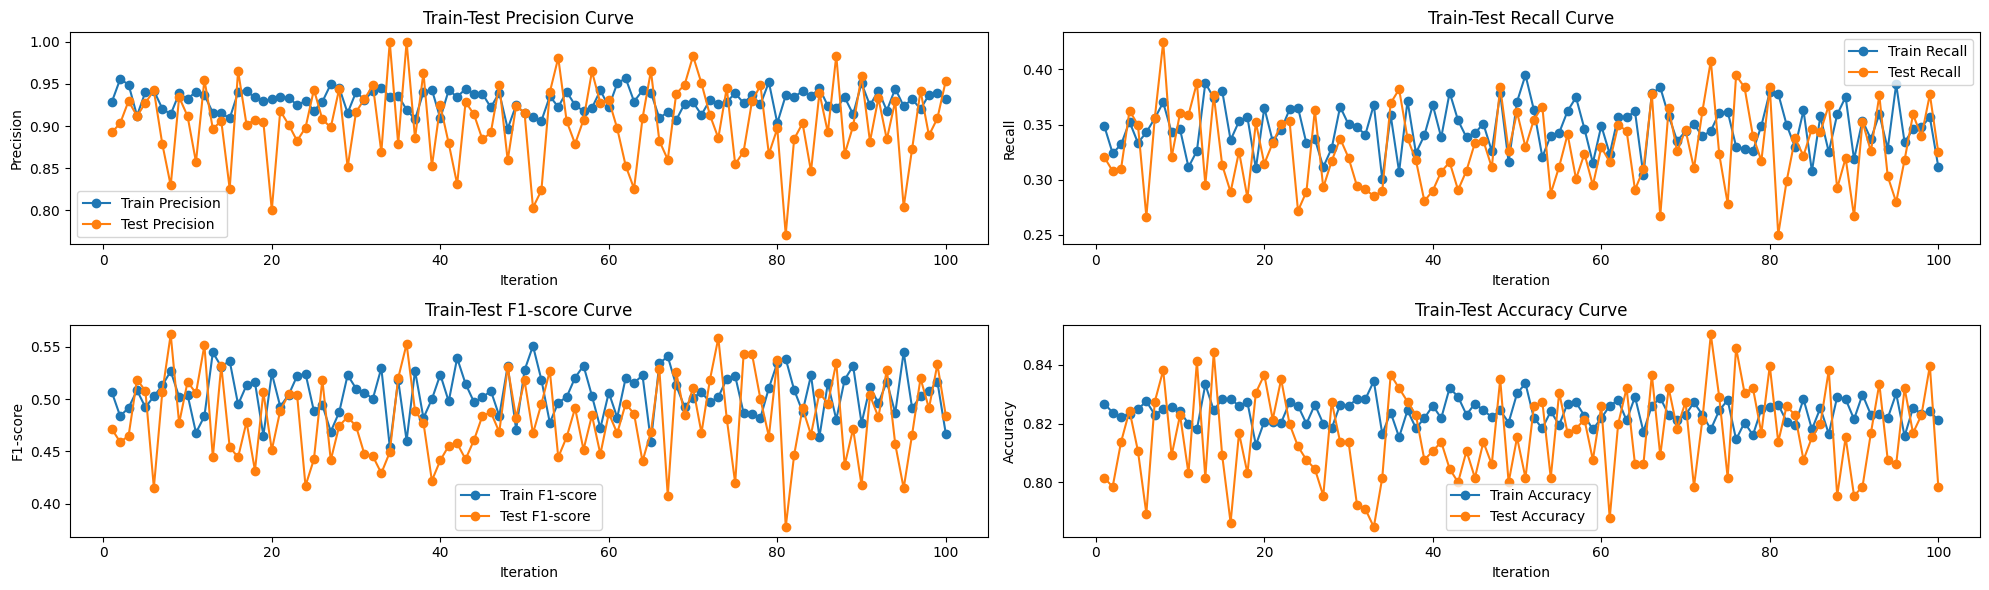

In [29]:
# Initialize lists to store train and test scores for each iteration
train_precision, test_precision = [], []
train_recall, test_recall = [], []
train_f1, test_f1 = [], []
train_accuracy, test_accuracy = [], []

# Number of iterations for train-test splits
num_iterations = 100

for i in range(num_iterations):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Step 3: Model training
    model_rfc = RandomForestClassifier(criterion='entropy', max_depth=3, max_features='auto', n_estimators=100)
    model_rfc.fit(X_train, y_train)

    # Step 4: Model evaluation on train and test sets
    y_train_pred = model_rfc.predict(X_train)
    y_test_pred = model_rfc.predict(X_test)

    # Calculate precision, recall, F1-score, and accuracy for train and test sets
    train_precision.append(precision_score(y_train, y_train_pred))
    test_precision.append(precision_score(y_test, y_test_pred))

    train_recall.append(recall_score(y_train, y_train_pred))
    test_recall.append(recall_score(y_test, y_test_pred))

    train_f1.append(f1_score(y_train, y_train_pred))
    test_f1.append(f1_score(y_test, y_test_pred))

    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Plot train-test curves
iterations = np.arange(1, num_iterations + 1)

plt.figure(figsize=(20, 6))

# Precision curve
plt.subplot(2, 2, 1)
plt.plot(iterations, train_precision, marker='o', label='Train Precision')
plt.plot(iterations, test_precision, marker='o', label='Test Precision')
plt.xlabel('Iteration')
plt.ylabel('Precision')
plt.title('Train-Test Precision Curve')
plt.legend()

# Recall curve
plt.subplot(2, 2, 2)
plt.plot(iterations, train_recall, marker='o', label='Train Recall')
plt.plot(iterations, test_recall, marker='o', label='Test Recall')
plt.xlabel('Iteration')
plt.ylabel('Recall')
plt.title('Train-Test Recall Curve')
plt.legend()

# F1-score curve
plt.subplot(2, 2, 3)
plt.plot(iterations, train_f1, marker='o', label='Train F1-score')
plt.plot(iterations, test_f1, marker='o', label='Test F1-score')
plt.xlabel('Iteration')
plt.ylabel('F1-score')
plt.title('Train-Test F1-score Curve')
plt.legend()

# Accuracy curve
plt.subplot(2, 2, 4)
plt.plot(iterations, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(iterations, test_accuracy, marker='o', label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Train-Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()


In [30]:
# Create an SVM model
svm_model = SVC(kernel="linear")

# Initialize RFE with SVM model and desired number of features
num_features_to_select = 5  # You can set the number of features you want to select
rfe = RFE(estimator=svm_model, n_features_to_select=num_features_to_select)

# Fit RFE
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Transform the training and test sets with the selected features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Fit SVM model on the selected features
svm_model.fit(X_train_selected, y_train)

# Evaluate SVM model on the test set with selected features
svm_model_score_selected = svm_model.score(X_test_selected, y_test)
print("Support Vector Machine (SVM) Accuracy with Feature Selection:", svm_model_score_selected)


Support Vector Machine (SVM) Accuracy with Feature Selection: 0.7175572519083969
